In [1]:
import torchvision
import torchvision.transforms as transforms
import torch
from question7 import split_train_validation
from question8 import get_batch_size

i = 28

transform = transforms.Compose([
    transforms.Resize((i, i)),
    transforms.Grayscale(),
    transforms.ToTensor()
])

imagefolder_train = torchvision.datasets.ImageFolder('MNIST_dataset/MNIST_variable_resolution/mnist-varres/train', transform=transform)
imagefolder_test = torchvision.datasets.ImageFolder('MNIST_dataset/MNIST_variable_resolution/mnist-varres/test', transform=transform)

batch_size = get_batch_size()
train_batches, val_batches = split_train_validation(
    training_data=imagefolder_train,
    batch_size=batch_size
)
test = torch.utils.data.DataLoader(imagefolder_test, batch_size=batch_size, shuffle=True)

In [2]:
for input, label in train_batches:
    print(input.shape)
    break

torch.Size([16, 1, 28, 28])


In [3]:
from question8 import cnn

results = cnn(train=train_batches, val=val_batches, batch_size=batch_size)

Using device: mps
Epoch 1/10, loss: 1.749, accuracy: 0.723, time: 30.013497 seconds
Epoch 1, val accuracy: 0.872
Epoch 2/10, loss: 1.581, accuracy: 0.886, time: 32.509939 seconds
Epoch 2, val accuracy: 0.892
Epoch 3/10, loss: 1.549, accuracy: 0.916, time: 32.886895 seconds
Epoch 3, val accuracy: 0.922
Epoch 4/10, loss: 1.532, accuracy: 0.932, time: 32.530718 seconds
Epoch 4, val accuracy: 0.931
Epoch 5/10, loss: 1.523, accuracy: 0.940, time: 32.851447 seconds
Epoch 5, val accuracy: 0.939
Epoch 6/10, loss: 1.516, accuracy: 0.947, time: 32.868222 seconds
Epoch 6, val accuracy: 0.947
Epoch 7/10, loss: 1.511, accuracy: 0.951, time: 32.719222 seconds
Epoch 7, val accuracy: 0.942
Epoch 8/10, loss: 1.508, accuracy: 0.954, time: 33.094257 seconds
Epoch 8, val accuracy: 0.953
Epoch 9/10, loss: 1.504, accuracy: 0.958, time: 32.690841 seconds
Epoch 9, val accuracy: 0.944
Epoch 10/10, loss: 1.502, accuracy: 0.960, time: 32.951359 seconds
Epoch 10, val accuracy: 0.947


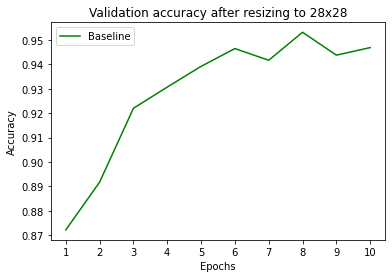

In [4]:
import matplotlib.pyplot as plt
acc = results['accuracy']

epochs = results['epoch']
epochs = [str(epoch) for epoch in epochs]

plt.plot(epochs, acc, 'g', label='Baseline')
plt.title('Validation accuracy after resizing to 28x28')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('Images/acc_variable_mnist_28_28.png')
plt.show()